# <center> Análise de Risco de crédito </center>
###### Base disponivel no Kaggle : https://www.kaggle.com/kabure/german-credit-data-with-risk

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Define o maximo de linhas mostradas
pd.set_option('display.max_rows', 500)

# Abrindo arquivo com Pandas

In [3]:
%%bash
ls

german_credit_data.csv
german_credit_data_Without.csv
Risk Credit.ipynb


In [6]:
dataset = pd.read_csv("german_credit_data.csv")

In [7]:
dataset

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
5,5,35,male,1,free,NaN,NaN,9055,36,education,good
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,7,35,male,3,rent,little,moderate,6948,36,car,good
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,9,28,male,3,own,little,moderate,5234,30,car,bad


In [8]:
#Exibindo as colunas da base
dataset.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [9]:
#Drop na linha Unnamed
dataset.drop('Unnamed: 0', axis = 1, inplace = True) 
#dataset = dataset.drop('Unnamed: 0', axis = 1)

In [10]:
dataset

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
5,35,male,1,free,NaN,NaN,9055,36,education,good
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,35,male,3,rent,little,moderate,6948,36,car,good
8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,28,male,3,own,little,moderate,5234,30,car,bad


# Analisando os dados 

In [9]:
dataset.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [11]:
# Mostra as informações sobre a base, mostra o tipo dos atributos
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


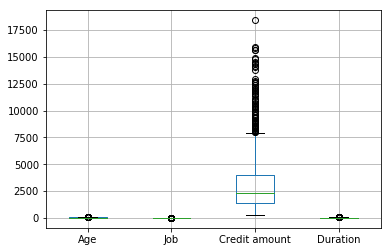

In [11]:
#Boxplot do dataset

dataset.boxplot()

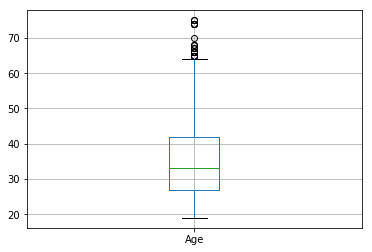

In [16]:
#Boxplot dos dados da coluna Age
dataset.boxplot(column = 'Age')

In [18]:
#Mostra os 10 maiores valores do Credit Amount
dataset.nlargest(columns="Credit amount", n=10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
915,32,female,3,own,little,moderate,18424,48,vacation/others,bad
95,58,male,2,rent,little,moderate,15945,54,business,bad
818,43,male,3,own,little,little,15857,36,vacation/others,good
887,23,male,2,own,little,moderate,15672,48,business,bad
637,21,male,2,own,little,NaN,15653,60,radio/TV,good
917,68,male,3,own,little,little,14896,6,car,bad
374,60,female,3,free,moderate,moderate,14782,60,vacation/others,bad
236,23,male,0,own,NaN,moderate,14555,6,car,bad
63,25,male,2,own,little,moderate,14421,48,business,bad
378,57,male,3,free,little,moderate,14318,36,car,bad


In [17]:
# Unique mostra os valores unicos dentro do dataset
dataset.Sex.unique()

array(['male', 'female'], dtype=object)

In [13]:
#Procura onde tem dados null no dataset
null_columns = dataset.columns[dataset.isnull().any()]
null_columns

Index(['Saving accounts', 'Checking account'], dtype='object')

In [14]:
#Conta quantos null tem na base
dataset.loc[dataset[null_columns[1]].isnull()].count()

Age                 394
Sex                 394
Job                 394
Housing             394
Saving accounts     295
Checking account      0
Credit amount       394
Duration            394
Purpose             394
Risk                394
dtype: int64

In [28]:
#Quantidade de itens classificados como Bad antes do Drop
dataset.loc[dataset['Risk'] == 'bad'].count()

Age                 300
Sex                 300
Job                 300
Housing             300
Saving accounts     268
Checking account    254
Credit amount       300
Duration            300
Purpose             300
Risk                300
dtype: int64

In [29]:
#Quantidade de itens classificados como Good antes do Drop
dataset.loc[dataset['Risk'] == 'good'].count()

Age                 700
Sex                 700
Job                 700
Housing             700
Saving accounts     549
Checking account    352
Credit amount       700
Duration            700
Purpose             700
Risk                700
dtype: int64

# Removendo dados Null

In [16]:
a = dataset.loc[dataset[null_columns[0]].isnull()]
a = a.loc[dataset[null_columns[1]].isnull()]

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
5,35,male,1,free,NaN,NaN,9055,36,education,good
16,53,male,2,own,NaN,NaN,2424,24,radio/TV,good
24,26,male,2,own,NaN,NaN,2069,10,furniture/equipment,good
33,57,male,1,rent,NaN,NaN,1264,12,business,good
53,31,male,2,own,NaN,NaN,3378,18,car,good
55,26,male,1,own,NaN,NaN,783,6,car,good
65,48,male,2,own,NaN,NaN,5190,27,repairs,good
69,25,female,2,own,NaN,NaN,2394,36,radio/TV,good
71,46,male,1,rent,NaN,NaN,730,7,radio/TV,good
78,39,male,1,own,NaN,NaN,9436,54,car,good


In [17]:
#Retorna os indice dos locais com colunas nulas
dataset.loc[dataset[null_columns[0]].isnull()].index

Int64Index([  0,   5,  16,  17,  24,  33,  50,  53,  55,  56,
            ...
            942, 947, 956, 962, 965, 968, 977, 990, 992, 994],
           dtype='int64', length=183)

In [18]:
# Drop nas colunas
dataset_new = dataset.drop(dataset.loc[dataset[null_columns[0]].isnull()].index)

In [115]:
dataset_new = dataset_new.drop(dataset_new.loc[dataset_new[null_columns[1]].isnull()].index)

In [116]:
dataset_new

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
1,22,0,2,1,little,moderate,5951,48,5,bad
3,45,1,2,0,little,little,7882,42,4,good
4,53,1,2,0,little,little,4870,24,1,bad
7,35,1,3,2,little,moderate,6948,36,1,good
9,28,1,3,1,little,moderate,5234,30,1,bad
10,25,0,2,2,little,moderate,1295,12,1,bad
11,24,0,2,2,little,little,4308,48,0,bad
12,22,0,2,1,little,moderate,1567,12,5,good
13,60,1,1,1,little,little,1199,24,1,bad
14,28,0,2,2,little,little,1403,15,1,good


In [117]:
dataset_new.count()

Age                 522
Sex                 522
Job                 522
Housing             522
Saving accounts     522
Checking account    522
Credit amount       522
Duration            522
Purpose             522
Risk                522
dtype: int64

In [30]:
#Quantidade de itens classificados como Bad depois do drop
dataset_new.loc[dataset['Risk'] == 'bad'].count()

Age                 268
Sex                 268
Job                 268
Housing             268
Saving accounts     268
Checking account    231
Credit amount       268
Duration            268
Purpose             268
Risk                268
dtype: int64

In [31]:
#Quantidade de itens classificados como Bad depois do drop
dataset_new.loc[dataset['Risk'] == 'good'].count()

Age                 549
Sex                 549
Job                 549
Housing             549
Saving accounts     549
Checking account    291
Credit amount       549
Duration            549
Purpose             549
Risk                549
dtype: int64

# Fit transformation nos dados string

In [146]:

from sklearn.preprocessing import LabelEncoder

dataset_new['Sex'] = LabelEncoder().fit_transform(dataset_new['Sex'])
dataset_new['Housing'] = LabelEncoder().fit_transform(dataset_new['Housing'])
dataset_new['Purpose'] = LabelEncoder().fit_transform(dataset_new['Purpose'])
dataset_new['Saving accounts'] = LabelEncoder().fit_transform(dataset_new['Saving accounts'])
dataset_new['Checking account'] = LabelEncoder().fit_transform(dataset_new['Checking account'])

dataset_new

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
1,22,0,2,1,0,1,5951,48,5,bad
3,45,1,2,0,0,0,7882,42,4,good
4,53,1,2,0,0,0,4870,24,1,bad
7,35,1,3,2,0,1,6948,36,1,good
9,28,1,3,1,0,1,5234,30,1,bad
10,25,0,2,2,0,1,1295,12,1,bad
11,24,0,2,2,0,0,4308,48,0,bad
12,22,0,2,1,0,1,1567,12,5,good
13,60,1,1,1,0,0,1199,24,1,bad
14,28,0,2,2,0,0,1403,15,1,good


In [20]:
# Separando em dados de entrada
X = dataset_new.iloc[:,:-1].values

In [150]:
X

array([[  22,    0,    2, ..., 5951,   48,    5],
       [  45,    1,    2, ..., 7882,   42,    4],
       [  53,    1,    2, ..., 4870,   24,    1],
       ...,
       [  40,    1,    3, ..., 3857,   30,    1],
       [  23,    1,    2, ..., 1845,   45,    5],
       [  27,    1,    2, ..., 4576,   45,    1]])

In [21]:
#Classificação do risco
y = dataset_new.iloc[:,-1:].values

# Split data

In [218]:
import numpy as np
from sklearn.model_selection import train_test_split

In [219]:
#Separando em dados de treino(entrada e saida) e dados de teste(entrada e saida)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

In [237]:
#Utilização do KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

/home/conductorlab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [238]:
y_pred = (knn.predict(X_test))

In [239]:
# Construindo matriz de confusao

In [240]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[20, 30],
       [17, 38]])

In [241]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred, normalize = True)
acc

0.5523809523809524

# Auto finding K value

In [242]:
from sklearn.model_selection import GridSearchCV

In [243]:
#Criando um novo modelo
knn2 = KNeighborsClassifier()

In [244]:
#Cria um dicionario com todos os valores de teste para o K
param_grid = {"n_neighbors": np.arange(1, 25)}

In [245]:

knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

In [246]:
#fit model to data
knn_gscv.fit(X_train, y_train)

/home/conductorlab/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/conductorlab/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/conductorlab/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/conductorlab/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_val

/home/conductorlab/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/conductorlab/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/conductorlab/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/conductorlab/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_val

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [247]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 13}

In [248]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.6426858513189448